In [1]:
import re
import datetime
import pathlib
import polars as pl # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

In [2]:
VERSION = datetime.datetime.now().strftime("%y%m%d")
print(f"Execute Date: {VERSION}")

Execute Date: 251213


## Parameters for papermill

In [3]:
foldseek_result_tsv = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_os_random_9606.tsv")
query_uniprot_idmapping_tsv = pathlib.Path("../test/oryza_sativa_test_202509/rice_random_gene_idmapping_all.tsv")
water_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_water")
needle_result_dir_path = pathlib.Path("../test/oryza_sativa_test_202509/result_needle")
query_gene_list_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/oryza_sativa_random_gene_list.tsv")
togoid_convert_tsv_path = pathlib.Path("../test/oryza_sativa_test_202509/foldseek_hit_species_togoid_convert.tsv")

In [4]:
# Parameters
foldseek_result_tsv = "/tmp/r62m3rsn/stge6a09ac8-7ee3-4dee-a1a8-5039196d18a0/foldseek_zm_100genes_9606_stringent.tsv"
query_uniprot_idmapping_tsv = "/tmp/r62m3rsn/stg759fd7f1-2def-4e12-9be2-aea6bc458566/zm_100_genes_idmapping_all.tsv"
water_result_dir_path = "/tmp/r62m3rsn/stgbe6c7b8c-2534-4862-8514-2d8e293fda86/result_water"
needle_result_dir_path = "/tmp/r62m3rsn/stgd92e9c01-955a-41b5-bb79-9b951b160b4d/result_needle"
query_gene_list_tsv_path = "/tmp/r62m3rsn/stgc3e2bd8a-3300-41ad-bee7-578bd73c8217/zea_mays_random_100genes_list.tsv"
togoid_convert_tsv_path = "/tmp/r62m3rsn/stg2afe6c73-746d-4449-ab97-fdde804016c3/foldseek_hit_species_togoid_convert_stringent.tsv"


In [5]:
foldseek_result_df = pl.read_csv(
    foldseek_result_tsv,
    separator='\t'
).with_columns(
    (pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession")), # "?" means non-greedy
    (pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit"))
)

foldseek_result = pl.read_csv(
    query_uniprot_idmapping_tsv, # query idmapping
    separator='\t'
).join(
    foldseek_result_df,
    on="UniProt Accession",
    how="inner",
    coalesce=True
)

display(foldseek_result)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str
"""Zm00001eb071760""","""B8A2J2""","""Q6P988""",1.2630e-14,1.0,19,21.0,0.21,69,4,294,299,156,450,496,328,0.973,0.595,0.6344,0.7484,0.465,0.465,4.019,"""LSFSGILGGNQKSNPDFYNWNRVKIRYCDG…","""RTGTGILSSQPEENPYWWNANMVFIPYCSS…",189,"""0.719,0.661,0.716,0.722,0.721,…"
"""Zm00001eb071760""","""B8A2J2""","""P10768""",0.04597,0.473,10,14.9,0.149,31,33,227,299,102,276,282,207,0.652,0.621,0.3232,0.2946,0.3089,0.3089,12.33,"""GSSFTGDVEAVDTAKDLRYRGFRVWRAVID…","""GAGFY--VDATEDPWKTNYRMYSYVTEELP…",132,"""0.255,0.278,0.257,0.313,0.397,…"
"""Zm00001eb071760""","""B8A2J2""","""P13798""",0.0344,0.411,12,16.6,0.166,32,56,227,299,563,726,732,192,0.575,0.224,0.3208,0.2413,0.1133,0.1133,13.75,"""VWRAVIDDLLTVR-GMSKAQNALLSGCSAG…","""VQFAVEQVLQEEHFDASH---VALMGGSHG…",112,"""0.222,0.366,0.441,0.444,0.442,…"
"""Zm00001eb071760""","""B8A2J2""","""Q86WA6""",0.03863,0.326,8,16.0,0.16,23,56,180,299,113,244,291,143,0.418,0.454,0.2936,0.1916,0.1958,0.1958,9.531,"""VWRAVIDDLLTVRGMSKAQNALLSGCSAGG…","""FFERDAKDAVDLMKALKFKKVSLLGWSDGG…",91,"""0.294,0.284,0.304,0.389,0.372,…"
"""Zm00001eb071760""","""B8A2J2""","""Q8WU67""",0.06142,0.233,17,13.6,0.136,36,56,279,299,197,402,409,263,0.749,0.504,0.2914,0.2777,0.215,0.215,11.34,"""VWRAVIDDLLTVRGMSKAQNALLSGCSAGG…","""DLETVIHHVHSLYP--SAP-FLAAGVSMGG…",131,"""0.283,0.306,0.304,0.389,0.366,…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb063070""","""A0A804M6K2""","""Q8ND71""",0.05261,0.082,39,10.1,0.101,56,1,463,464,227,649,665,550,0.998,0.636,0.2635,0.1482,0.1145,0.1145,26.99,"""MTPPAAPTMAAGDAVHVGRRRHVLLFPLPY…","""QGPRERQLQSTGPEQNPGTSELTVLLVG-K…",280,"""1.000,1.000,1.000,1.000,1.000,…"
"""Zm00001eb063070""","""A0A804M6K2""","""Q14147""",0.09529,0.063,26,13.3,0.133,55,86,415,464,150,511,1143,412,0.711,0.317,0.2354,0.1473,0.08806,0.08806,16.89,"""DVVAHILELGRACE--AAFRDRLASVLEEY…","""GRLAK-LQRERAALPIAQYGNRILQTLKEH…",225,"""0.155,0.121,0.118,0.162,0.179,…"
"""Zm00001eb063070""","""A0A804M6K2""","""Q9BY41""",0.09529,0.057,29,12.3,0.123,58,8,434,464,1,320,377,470,0.92,0.849,0.2343,0.1292,0.1485,0.1485,21.33,"""TMAAGDAVHVGRRRHVLLFPLPYQGHINPM…","""MEEPEEPADSGQSLVPVYIYSPEYVSMCDS…",219,"""0.556,0.667,0.700,0.861,0.725,…"


&nbsp;

&nbsp;

## Create Scatter Plot for all hits (Strucutural alignment identity vs LDDT)

- Identity in the results of the structural alignment is also output in the foldseek output.
- However, in this notebook, you can also select the results of the pairwise alignment of amino acid sequences (global alignment, local alignment).

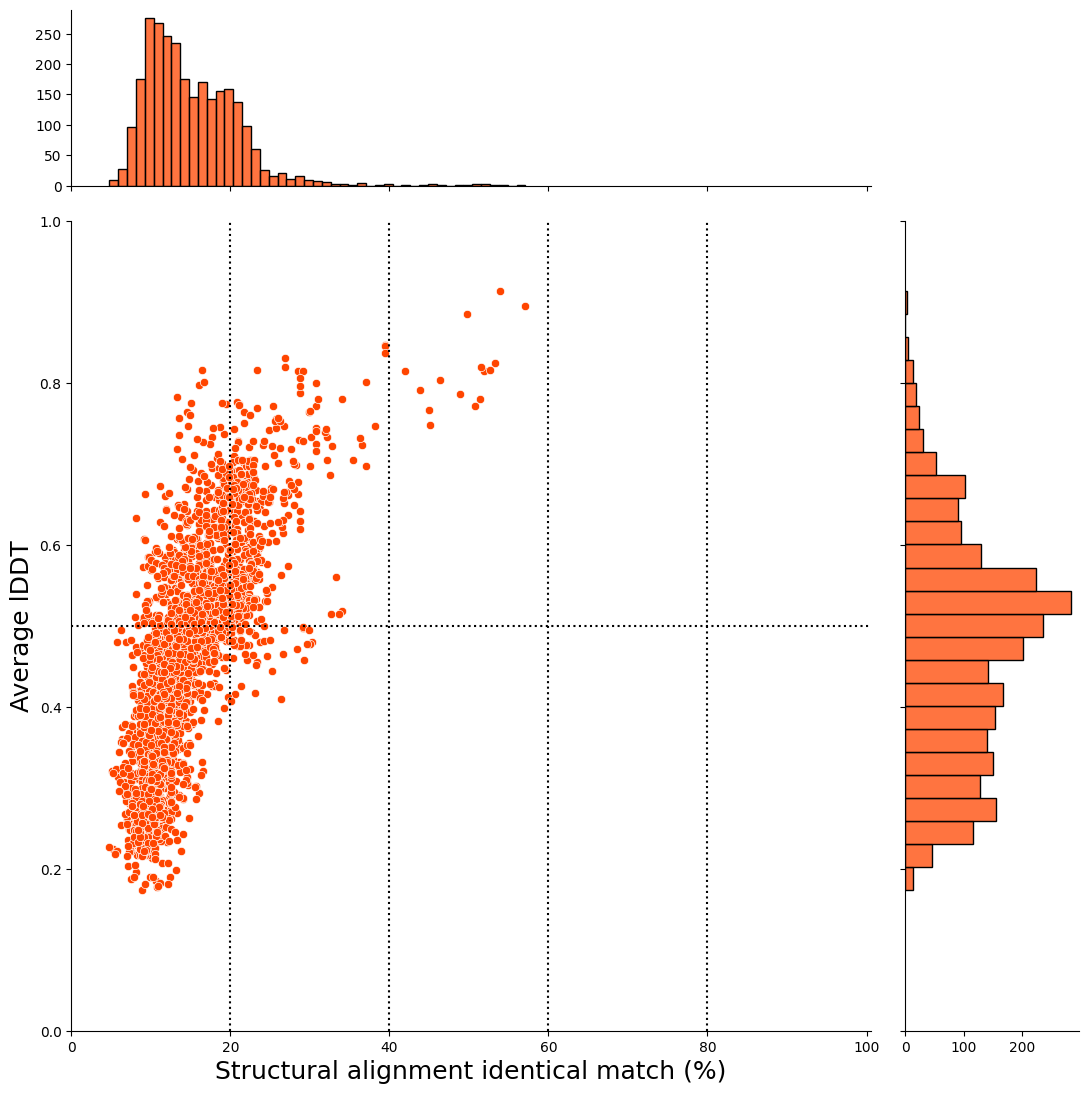

In [6]:
foldseek_filter_viz = foldseek_result.to_pandas()
sns.jointplot(
    data=foldseek_filter_viz,
    x="pident", # structural alignment identical match from foldseek result
    y="lddt",
    color="orangered",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Structural alignment identical match (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Parse pairwise alignment result (water and needle)

In [7]:
def parse_needle_water_result(file_path: str):
    with open(file_path, "r", encoding="utf-8") as file:
        data = file.readlines()
        
    result = {
        "UniProt Accession": None,
        "foldseek hit": None,
        "Length": None,
        "Identity": None,
        "Identity_percent": None,
        "Similarity": None,
        "Similarity_percent": None,
        "Gaps": None,
        "Gaps_percent": None,
        "Score": None
    }
    
    for line in data:
        if line.startswith('# 1:'):
            result['UniProt Accession'] = line.split(':')[1].strip()
        elif line.startswith('# 2:'):
            result['foldseek hit'] = line.split(':')[1].strip()
        elif line.startswith('# Length:'):
            result['Length'] = int(line.split()[2])
        elif line.startswith('# Identity:'):
            result['Identity'] = line.split()[2]
            result['Identity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Similarity:'):
            result['Similarity'] = line.split()[2]
            result['Similarity_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Gaps:'):
            result['Gaps'] = line.split()[2]
            result['Gaps_percent'] = float(re.search(r'\((.*?)%\)', line).group(1))
        elif line.startswith('# Score:'):
            result['Score'] = float(line.split()[2])
            
    return result

In [8]:
water_result_dir = pathlib.Path(water_result_dir_path)
needle_result_dir = pathlib.Path(needle_result_dir_path)

# Initialize empty lists to store DataFrames
water_dfs = []
needle_dfs = []

# Collect all water results
for result_file in water_result_dir.glob("*_align.water"):
    parsed_data = parse_needle_water_result(result_file)
    water_dfs.append(pl.DataFrame([parsed_data]))

# Collect all needle results    
for result_file in needle_result_dir.glob("*_align.needle"):
    parsed_data = parse_needle_water_result(result_file)
    needle_dfs.append(pl.DataFrame([parsed_data]))

# Combine all results and sort only if there are results
water_result = (pl.concat(water_dfs, how='vertical')
                .sort(["UniProt Accession", "foldseek hit"]) 
                if water_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

needle_result = (pl.concat(needle_dfs, how='vertical')
                 .sort(["UniProt Accession", "foldseek hit"])
                 if needle_dfs else pl.DataFrame()).with_columns(
                    pl.col("UniProt Accession").str.extract(r"AF-(.*?)-F1", 1).alias("UniProt Accession"), # add removing AF- prefix
                    pl.col("foldseek hit").str.extract(r"AF-(.*?)-F1", 1).alias("foldseek hit") # add removing AF- prefix
                )

display(water_result)
display(needle_result)

UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A096RP22""","""O00461""",387,"""72/387""",18.6,"""124/387""",32.0,"""132/387""",34.1,106.5
"""A0A096RP22""","""Q0D2I5""",315,"""64/315""",20.3,"""112/315""",35.6,"""68/315""",21.6,83.5
"""A0A1D6E3A9""","""A0AAG2SWV4""",551,"""97/551""",17.6,"""170/551""",30.9,"""201/551""",36.5,76.5
"""A0A1D6E3A9""","""A0ABB0MV19""",446,"""85/446""",19.1,"""144/446""",32.3,"""150/446""",33.6,69.0
"""A0A1D6E3A9""","""A0AV02""",362,"""70/362""",19.3,"""121/362""",33.4,"""134/362""",37.0,61.5
…,…,…,…,…,…,…,…,…,…
"""P12857""","""Q9NZJ7""",138,"""32/138""",23.2,"""59/138""",42.8,"""20/138""",14.5,64.0
"""P12857""","""Q9UBX3""",282,"""69/282""",24.5,"""118/282""",41.8,"""47/282""",16.7,182.5
"""P12857""","""Q9UJS0""",320,"""98/320""",30.6,"""147/320""",45.9,"""58/320""",18.1,300.5


UniProt Accession,foldseek hit,Length,Identity,Identity_percent,Similarity,Similarity_percent,Gaps,Gaps_percent,Score
str,str,i64,str,f64,str,f64,str,f64,f64
"""A0A096RP22""","""O00461""",754,"""91/754""",12.1,"""156/754""",20.7,"""435/754""",57.7,85.0
"""A0A096RP22""","""Q0D2I5""",676,"""77/676""",11.4,"""140/676""",20.7,"""416/676""",61.5,60.0
"""A0A1D6E3A9""","""A0AAG2SWV4""",727,"""120/727""",16.5,"""208/727""",28.6,"""292/727""",40.2,69.0
"""A0A1D6E3A9""","""A0ABB0MV19""",933,"""116/933""",12.4,"""191/933""",20.5,"""534/933""",57.2,43.0
"""A0A1D6E3A9""","""A0AV02""",946,"""88/946""",9.3,"""133/946""",14.1,"""651/946""",68.8,36.0
…,…,…,…,…,…,…,…,…,…
"""P12857""","""Q9NZJ7""",538,"""70/538""",13.0,"""116/538""",21.6,"""300/538""",55.8,45.5
"""P12857""","""Q9UBX3""",409,"""78/409""",19.1,"""132/409""",32.3,"""144/409""",35.2,175.5
"""P12857""","""Q9UJS0""",748,"""111/748""",14.8,"""173/748""",23.1,"""434/748""",58.0,281.5


In [9]:
alignment_result = water_result.join(
    needle_result,
    on=["UniProt Accession", "foldseek hit"],
    how="inner",
    coalesce=True,
    suffix="_needle"
).rename(
    {
        "Length": "Length_water",
        "Identity": "Identity_water",
        "Identity_percent": "Identity_percent_water",
        "Similarity": "Similarity_water",
        "Similarity_percent": "Similarity_percent_water",
        "Gaps": "Gaps_water",
        "Gaps_percent": "Gaps_percent_water",
        "Score": "Score_water"
    }
).select(
    [
        "UniProt Accession",
        "foldseek hit",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_needle",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_needle",
        "Gaps_percent_water",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
)

display(alignment_result)

UniProt Accession,foldseek hit,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""A0A096RP22""","""O00461""",387,754,"""72/387""","""91/754""",18.6,12.1,32.0,20.7,"""132/387""","""435/754""",34.1,57.7,106.5,85.0
"""A0A096RP22""","""Q0D2I5""",315,676,"""64/315""","""77/676""",20.3,11.4,35.6,20.7,"""68/315""","""416/676""",21.6,61.5,83.5,60.0
"""A0A1D6E3A9""","""A0AAG2SWV4""",551,727,"""97/551""","""120/727""",17.6,16.5,30.9,28.6,"""201/551""","""292/727""",36.5,40.2,76.5,69.0
"""A0A1D6E3A9""","""A0ABB0MV19""",446,933,"""85/446""","""116/933""",19.1,12.4,32.3,20.5,"""150/446""","""534/933""",33.6,57.2,69.0,43.0
"""A0A1D6E3A9""","""A0AV02""",362,946,"""70/362""","""88/946""",19.3,9.3,33.4,14.1,"""134/362""","""651/946""",37.0,68.8,61.5,36.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""P12857""","""Q9NZJ7""",138,538,"""32/138""","""70/538""",23.2,13.0,42.8,21.6,"""20/138""","""300/538""",14.5,55.8,64.0,45.5
"""P12857""","""Q9UBX3""",282,409,"""69/282""","""78/409""",24.5,19.1,41.8,32.3,"""47/282""","""144/409""",16.7,35.2,182.5,175.5
"""P12857""","""Q9UJS0""",320,748,"""98/320""","""111/748""",30.6,14.8,45.9,23.1,"""58/320""","""434/748""",18.1,58.0,300.5,281.5


&nbsp;


&nbsp;

## Integrate foldseek result and pairwise alignment result

- This time, **exclude the ones that are null in pairwise alignment result, which means the current UniProt entry is obsolete**

In [10]:
join_foldseek = foldseek_result.join(
    alignment_result,
    on=["UniProt Accession", "foldseek hit"],
    how="left",
    coalesce=True
).filter( # filter out null alignment result (this means current UniProt entry is obsolete)
    pl.col("Length_water").is_not_null() & 
    pl.col("Length_needle").is_not_null()
).unique()


print(join_foldseek.group_by(["UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(join_foldseek.head())

shape: (2_482, 41)
┌─────────────┬────────────┬──────┬────────┬───┬────────────┬────────────┬────────────┬────────────┐
│ UniProt     ┆ foldseek   ┆ From ┆ evalue ┆ … ┆ Gaps_perce ┆ Gaps_perce ┆ Score_wate ┆ Score_need │
│ Accession   ┆ hit        ┆ ---  ┆ ---    ┆   ┆ nt_water   ┆ nt_needle  ┆ r          ┆ le         │
│ ---         ┆ ---        ┆ u32  ┆ u32    ┆   ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str         ┆ str        ┆      ┆        ┆   ┆ u32        ┆ u32        ┆ u32        ┆ u32        │
╞═════════════╪════════════╪══════╪════════╪═══╪════════════╪════════════╪════════════╪════════════╡
│ A0A804NJP7  ┆ Q6ZSU1     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ C0HI29      ┆ Q12788     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ C0HI29      ┆ Q9ULI1     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1          ┆ 1          ┆ 1          │
│ C4J4G8      ┆ Q92630     ┆ 1    ┆ 1      ┆ … ┆ 1          ┆ 1         

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Zm00001eb165550""","""A0A804NJP7""","""Q6ZSU1""",3.3260e-9,1.0,3,26.4,0.264,40,201,349,352,1,146,146,151,0.423,1.0,0.5629,0.3738,0.8462,0.8462,2.766,"""MPYLKATIKETLRLHPPAPFLLPHYSTADS…","""MPYTDVVIHEIQRLVDIVPMGVPHNIIQDT…",104,"""0.422,0.380,0.398,0.373,0.496,…",110,363,"""38/110""","""47/363""",34.5,12.9,48.2,19.0,"""7/110""","""228/363""",6.4,62.8,156.5,153.0
"""Zm00001eb116750""","""C0HI29""","""Q12788""",0.0004538,0.505,29,8.6,0.086,40,43,399,429,5,377,808,460,0.832,0.462,0.2447,0.2045,0.1331,0.1331,17.66,"""RMDLLPHSVSGLFINFNELSMS--------…","""AAGVGRFKTNYAVERKIEPFYKGGKAQLDQ…",230,"""0.079,0.094,0.191,0.136,0.152,…",460,894,"""87/460""","""99/894""",18.9,11.1,29.8,17.9,"""171/460""","""551/894""",37.2,61.6,62.0,41.0
"""Zm00001eb116750""","""C0HI29""","""Q9ULI1""",0.003975,0.442,23,10.5,0.105,29,71,299,429,1395,1615,1742,275,0.534,0.127,0.2552,0.1879,0.06506,0.06506,12.04,"""SKGPAISGKFDYLPSAGQV-IDHCNGLI--…","""INGQRIS----------QLLITHNDQFVVS…",146,"""0.071,0.185,0.167,0.147,0.088,…",445,1809,"""80/445""","""88/1809""",18.0,4.9,35.1,9.3,"""107/445""","""1447/1809""",24.0,80.0,71.5,59.0
"""Zm00001eb305300""","""C4J4G8""","""Q92630""",6.5100e-13,1.0,18,18.0,0.18,70,356,683,683,227,570,601,388,0.48,0.572,0.5249,0.2968,0.335,0.335,25.53,"""LLGVGGFGRVYKGTLPVSKLEVAVKRVSHD…","""VIGKGSFGQVVKAYDHKVHQHVALKMVRN-…",214,"""0.642,0.681,0.635,0.701,0.761,…",576,856,"""115/576""","""123/856""",20.0,14.4,34.4,24.5,"""179/576""","""428/856""",31.1,50.0,155.0,144.0
"""Zm00001eb305300""","""C4J4G8""","""Q9UBE8""",4.0000e-13,1.0,19,20.0,0.2,75,356,662,683,143,493,527,374,0.449,0.666,0.5259,0.3056,0.3904,0.3904,14.96,"""LLGVGGFGRVYKGTLPVSKLEVAVKRVS--…","""PIGYGAFGVVWSVTDPRDGKRVALKKMPNV…",209,"""0.608,0.667,0.620,0.639,0.697,…",300,804,"""79/300""","""128/804""",26.3,15.9,41.3,25.4,"""71/300""","""398/804""",23.7,49.5,181.5,160.0


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Create Scatter Plot for all hits (x-axis: Similarity_percent_needle) Global alignment

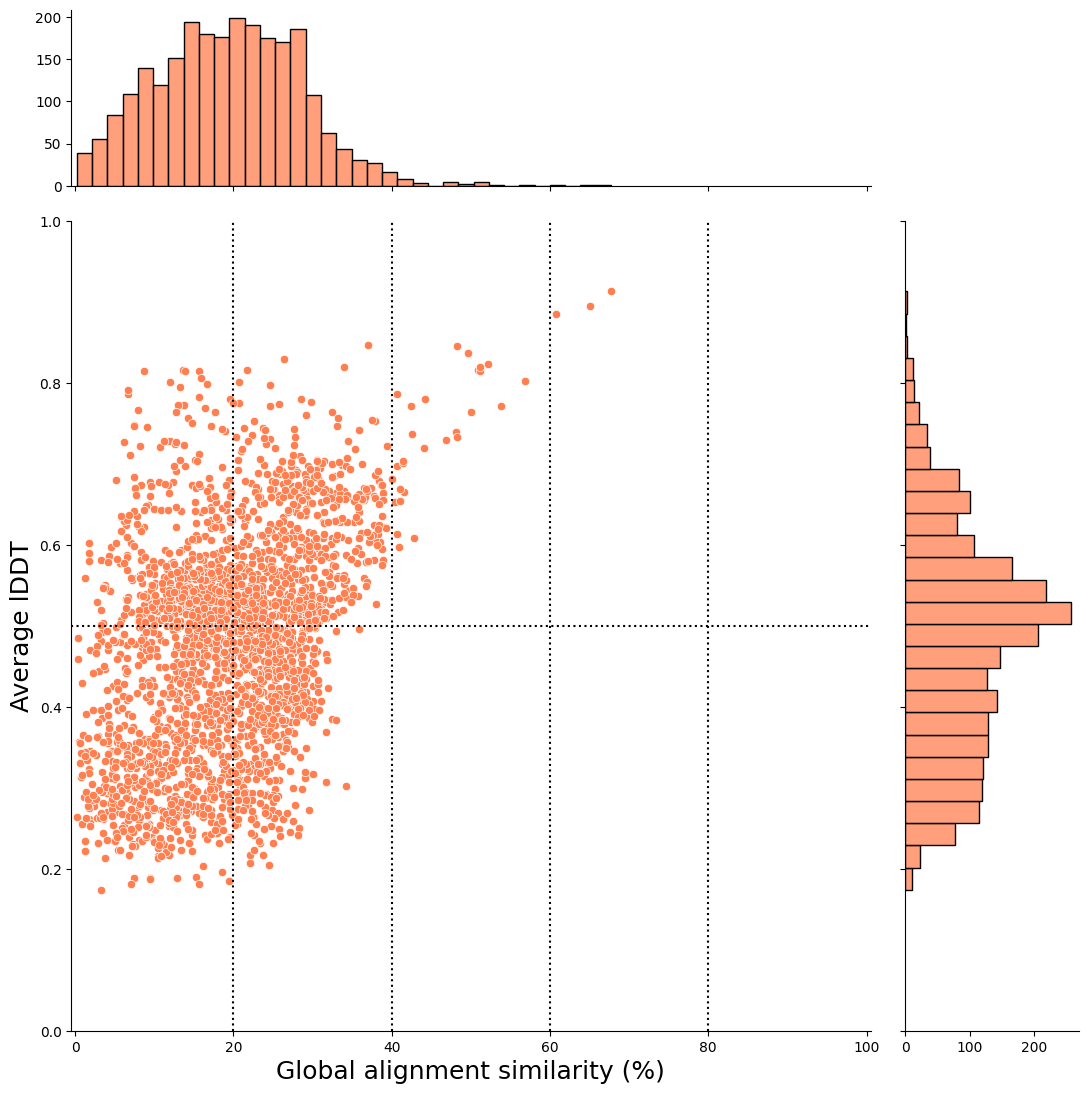

In [11]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100.5)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;


## Create Scatter Plot for all hits (x-axis: Similarity_percent_water) Local Alignment

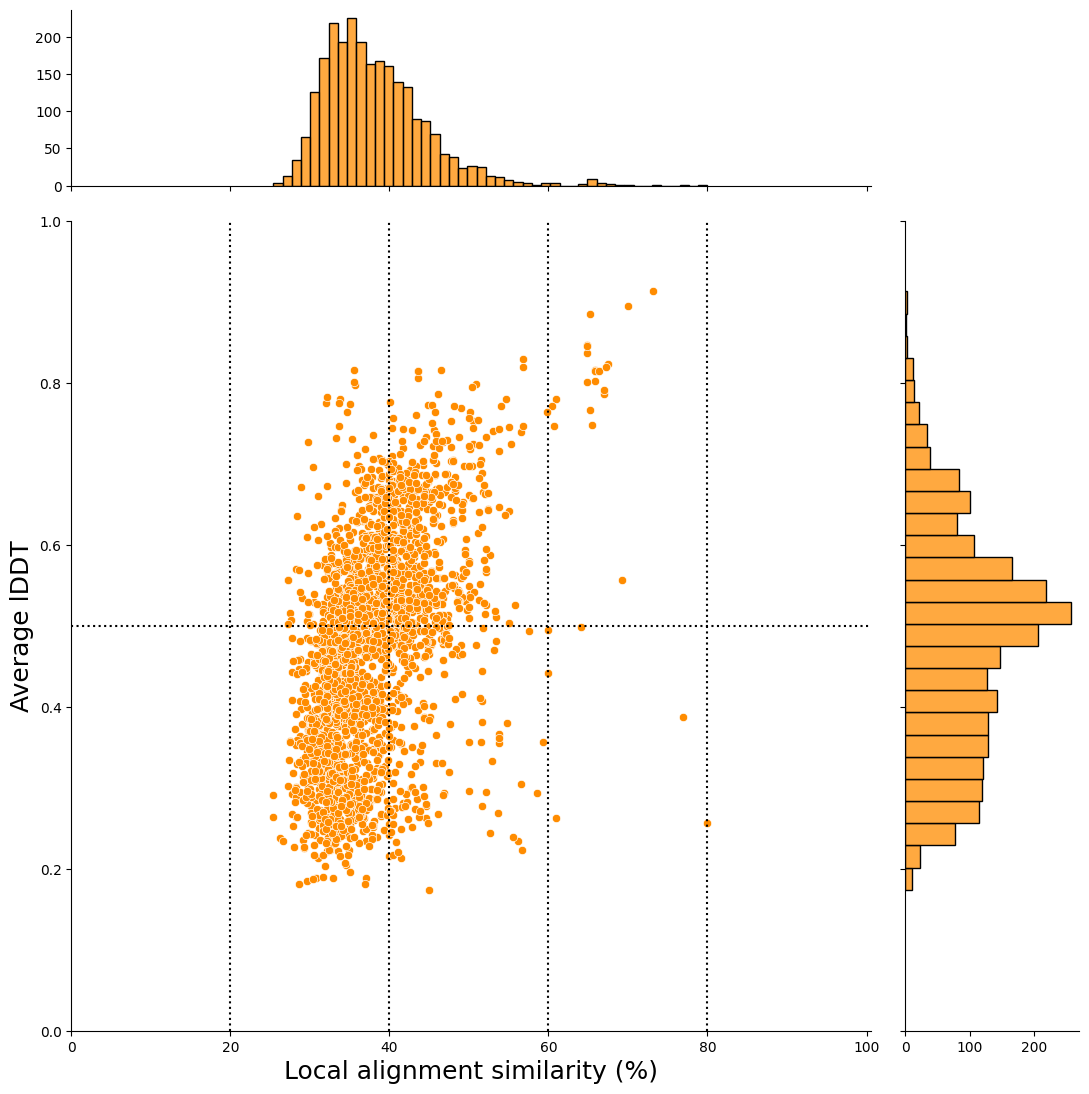

In [12]:
foldseek_filter_viz2 = join_foldseek.to_pandas()

sns.jointplot(
    data=foldseek_filter_viz2,
    x="Similarity_percent_water", # local alignment similarity
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(0,100.5)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Counting foldseek hits in Gene level

In [13]:
all_gene_list = pl.read_csv(
    query_gene_list_tsv_path,
    separator='\t'
).select(
    "From"
).unique()

hit_count = all_gene_list.join(
    join_foldseek,
    on="From",
    how="left",
    coalesce=True
).group_by("From", maintain_order=True).agg(
    (pl.col("foldseek hit").count().alias("target hit count (gene level vs uniprot accession)")),
    (pl.col("foldseek hit").is_null().all().alias("foldseek no hit"))
).sort(
    ["target hit count (gene level vs uniprot accession)"], descending=True
)

display(hit_count)

From,target hit count (gene level vs uniprot accession),foldseek no hit
str,u32,bool
"""Zm00001eb305300""",504,false
"""Zm00001eb025900""",226,false
"""Zm00001eb389480""",210,false
"""Zm00001eb360560""",206,false
"""Zm00001eb116750""",172,false
…,…,…
"""Zm00001eb304640""",0,true
"""Zm00001eb337120""",0,true
"""Zm00001eb153110""",0,true


&nbsp;

&nbsp;

&nbsp;

# Caution:
- The filtering steps that are executed below can be changed freely.

&nbsp;

## Filtering Condition1

- alignment coverage >= 0.5

In [14]:
condition1 = join_foldseek.filter(
        (pl.col("qcov") >= 0.5) &
        (pl.col("tcov") >= 0.5)
    ).sort(
        by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession
        descending=[False, False, False]
    )

condition1_rm = condition1.filter(
        (pl.col("qcov") < 0.5) |
        (pl.col("tcov") < 0.5)
    )

print(condition1.group_by(["From"], maintain_order=True).n_unique())
display(condition1)

shape: (43, 41)
┌────────────┬────────────┬───────────┬────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek  ┆ evalue ┆ … ┆ Gaps_perc ┆ Gaps_perc ┆ Score_wat ┆ Score_nee │
│ ---        ┆ Accession  ┆ hit       ┆ ---    ┆   ┆ ent_water ┆ ent_needl ┆ er        ┆ dle       │
│ str        ┆ ---        ┆ ---       ┆ u32    ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---       │
│            ┆ u32        ┆ u32       ┆        ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32       │
│            ┆            ┆           ┆        ┆   ┆           ┆ u32       ┆           ┆           │
╞════════════╪════════════╪═══════════╪════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Zm00001eb0 ┆ 1          ┆ 2         ┆ 2      ┆ … ┆ 2         ┆ 2         ┆ 2         ┆ 2         │
│ 15640      ┆            ┆           ┆        ┆   ┆           ┆           ┆           ┆           │
│ Zm00001eb0 ┆ 2          ┆ 138       ┆ 133    ┆ … ┆ 110       ┆ 141       

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,qaln,taln,mismatch,lddtfull,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_needle,Gaps_percent_water,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,str,str,i64,str,i64,i64,str,str,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""Zm00001eb015640""","""A0A804LJK8""","""Q8N5L8""",0.000049,1.0,2,31.0,0.31,31,34,131,171,68,162,163,100,0.573,0.583,0.7802,0.3663,0.3832,0.3832,19.4,"""IVTVITVKRRIVDLHQNTTTGSTDITDMWE…","""VSCAEIVKRRVPGLHQLTKLRFLQTEDSWV…",62,"""0.571,0.570,0.629,0.681,0.616,…",142,240,"""39/142""","""37/240""",27.5,15.4,33.8,19.6,"""49/142""","""146/240""",34.5,60.8,119.5,116.0
"""Zm00001eb015640""","""A0A804LJK8""","""Q9BUL9""",0.0002767,0.999,4,20.1,0.201,28,34,161,171,78,199,199,139,0.749,0.613,0.6764,0.2594,0.2257,0.2257,20.37,"""IVTVITVKRRIVDLHQNTTTG----STDIT…","""VTCAEILKRRLAGLHQVTRLRYRSVREVWQ…",83,"""0.600,0.570,0.603,0.688,0.665,…",142,252,"""35/142""","""38/252""",24.6,15.1,34.5,22.2,"""40/142""","""134/252""",28.2,53.2,100.0,97.5
"""Zm00001eb025900""","""C0P2K1""","""A1A5C7""",0.0004272,1.0,30,12.4,0.124,62,86,561,579,231,616,686,499,0.822,0.563,0.3827,0.3893,0.3405,0.3405,11.9,"""AKNISAWSGVCFLTPLLGAFVADSYLGRYW…","""IAKFSLLVGLIF-GYLITGCIAD-WVGRRP…",301,"""0.180,0.188,0.257,0.260,0.225,…",639,1038,"""125/639""","""66/1038""",19.6,6.4,31.0,10.2,"""223/639""","""811/1038""",34.9,78.1,62.5,46.5
"""Zm00001eb025900""","""C0P2K1""","""A6NFX1""",4.6650e-7,1.0,32,11.3,0.113,67,40,579,579,35,504,504,597,0.933,0.933,0.4561,0.5225,0.5899,0.5899,8.578,"""KHRTGNWRACYPVLGVGFSEGMVFSAIATN…","""RAGRLSFCTKVCYGIGGVPNQIASSATAFY…",346,"""0.214,0.270,0.250,0.241,0.302,…",467,682,"""100/467""","""123/682""",21.4,18.0,33.0,30.1,"""147/467""","""281/682""",31.5,41.2,63.0,42.0
"""Zm00001eb025900""","""C0P2K1""","""A6NIM6""",6.3220e-16,1.0,19,19.6,0.196,113,47,578,579,41,548,579,576,0.919,0.877,0.6281,0.6587,0.6587,0.6587,6.249,"""RACYPVLGVGFSEGMVFSAIATNLVTYLTT…","""QVGICLLLVELCERFTFFEVVCNMIPFCTI…",351,"""0.233,0.250,0.333,0.386,0.405,…",588,672,"""130/588""","""139/672""",22.1,20.7,37.4,34.4,"""127/588""","""186/672""",21.6,27.7,270.5,261.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb423300""","""K7TTJ0""","""P02511""",0.000004,1.0,5,25.0,0.25,30,83,200,217,66,173,175,120,0.544,0.617,0.6649,0.3522,0.4305,0.4305,10.23,"""ADWRETPDAHEIVVDVPGMRREDLKIEVED…","""SEMRLEKDRFSVNLDVKHFSPEELKVKV--…",76,"""0.712,0.829,0.885,0.867,0.867,…",115,242,"""34/115""","""49/242""",29.6,20.2,47.0,31.4,"""22/115""","""92/242""",19.1,38.0,91.5,69.0
"""Zm00001eb423300""","""K7TTJ0""","""P04792""",8.8050e-7,1.0,9,22.4,0.224,40,36,206,217,48,205,205,178,0.788,0.771,0.6092,0.3478,0.367,0.367,20.63,"""GGDEAAAAAASPLSGPGVGLLADPFRILEH…","""GSSWPGYVRPLPPAAIESPAVAAPAYS---…",111,"""0.344,0.531,0.531,0.594,0.688,…",144,278,"""35/144""","""46/278""",24.3,16.5,40.3,25.2,"""36/144""","""134/278""",25.0,48.2,81.5,64.5
"""Zm00001eb423300""","""K7TTJ0""","""Q9BQS6""",0.000069,1.0,8,19.4,0.194,35,33,198,217,5,159,159,180,0.765,0.975,0.5986,0.3416,0.4557,0.4557,23.37,"""GRRGGDEAAAAAASPLSGPGVGL-------…","""GNTFSNESRVASRCPSVGLAERNRVATMPV…",106,"""0.500,0.531,0.688,0.844,0.938,…",162,233,"""39/162""","""42/233""",24.1,18.0,40.1,30.5,"""34/162""","""90/233""",21.0,38.6,68.0,54.5


&nbsp;

&nbsp;

&nbsp;

&nbsp;

## Filtering Condition2

- If there are hits with the same target for the same gene-derived UniProt ID, the one with the highest qcov is selected, and if the qcov is the same, the one with the highest lDDT is selected.
- **Note that in this study, we leave the states with the same foldseek hit even if the rice genes are different.**

In [15]:
condition2 = condition1.sort(
    by=["qcov", "lddt"],
    descending=[True, True]
).group_by(
    ["From", "foldseek hit"],
    maintain_order=True
).agg(
    pl.all().first()
).sort(
    by=["From", "UniProt Accession", "foldseek hit"],
    descending=[False, False, False]
).select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "evalue",
    "prob",
    "gapopen",
    "pident",
    "fident",
    "nident",
    "qstart",
    "qend",
    "qlen",
    "tstart",
    "tend",
    "tlen",
    "alnlen",
    "qcov",
    "tcov",
    "lddt",
    "qtmscore",
    "ttmscore",
    "alntmscore",
    "rmsd",
    "mismatch",
    "Length_water",
    "Length_needle",
    "Identity_water",
    "Identity_needle",
    "Identity_percent_water",
    "Identity_percent_needle",
    "Similarity_percent_water",
    "Similarity_percent_needle",
    "Gaps_water",
    "Gaps_percent_water",
    "Gaps_needle",
    "Gaps_percent_needle",
    "Score_water",
    "Score_needle"
)

display(condition2)

From,UniProt Accession,foldseek hit,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,qcov,tcov,lddt,qtmscore,ttmscore,alntmscore,rmsd,mismatch,Length_water,Length_needle,Identity_water,Identity_needle,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,i64,str,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Zm00001eb015640""","""A0A804LJK8""","""Q8N5L8""",0.000049,1.0,2,31.0,0.31,31,34,131,171,68,162,163,100,0.573,0.583,0.7802,0.3663,0.3832,0.3832,19.4,62,142,240,"""39/142""","""37/240""",27.5,15.4,33.8,19.6,"""49/142""",34.5,"""146/240""",60.8,119.5,116.0
"""Zm00001eb015640""","""A0A804LJK8""","""Q9BUL9""",0.0002767,0.999,4,20.1,0.201,28,34,161,171,78,199,199,139,0.749,0.613,0.6764,0.2594,0.2257,0.2257,20.37,83,142,252,"""35/142""","""38/252""",24.6,15.1,34.5,22.2,"""40/142""",28.2,"""134/252""",53.2,100.0,97.5
"""Zm00001eb025900""","""A0A804LPD4""","""O00476""",0.02188,0.998,12,15.7,0.157,37,31,252,350,200,410,420,235,0.634,0.502,0.4731,0.4035,0.3452,0.3452,7.277,161,217,580,"""54/217""","""62/580""",24.9,10.7,37.3,17.4,"""64/217""",29.5,"""390/580""",67.2,102.5,95.5
"""Zm00001eb025900""","""A0A804LPD4""","""Q6NV75""",0.06362,0.179,17,10.5,0.105,40,46,323,350,14,375,609,380,0.794,0.594,0.3763,0.1463,0.09681,0.09681,24.57,220,237,696,"""51/237""","""70/696""",21.5,10.1,34.2,17.8,"""72/237""",30.4,"""433/696""",62.2,52.0,30.5
"""Zm00001eb025900""","""C0P2K1""","""A1A5C7""",0.0004272,1.0,30,12.4,0.124,62,86,561,579,231,616,686,499,0.822,0.563,0.3827,0.3893,0.3405,0.3405,11.9,301,639,1038,"""125/639""","""66/1038""",19.6,6.4,31.0,10.2,"""223/639""",34.9,"""811/1038""",78.1,62.5,46.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb423300""","""K7TTJ0""","""P02511""",0.000004,1.0,5,25.0,0.25,30,83,200,217,66,173,175,120,0.544,0.617,0.6649,0.3522,0.4305,0.4305,10.23,76,115,242,"""34/115""","""49/242""",29.6,20.2,47.0,31.4,"""22/115""",19.1,"""92/242""",38.0,91.5,69.0
"""Zm00001eb423300""","""K7TTJ0""","""P04792""",8.8050e-7,1.0,9,22.4,0.224,40,36,206,217,48,205,205,178,0.788,0.771,0.6092,0.3478,0.367,0.367,20.63,111,144,278,"""35/144""","""46/278""",24.3,16.5,40.3,25.2,"""36/144""",25.0,"""134/278""",48.2,81.5,64.5
"""Zm00001eb423300""","""K7TTJ0""","""Q9BQS6""",0.000069,1.0,8,19.4,0.194,35,33,198,217,5,159,159,180,0.765,0.975,0.5986,0.3416,0.4557,0.4557,23.37,106,162,233,"""39/162""","""42/233""",24.1,18.0,40.1,30.5,"""34/162""",21.0,"""90/233""",38.6,68.0,54.5


&nbsp;

&nbsp;

&nbsp;

## Filtering Condition3

- Select hits that can be converted to Ensembl gene id and HGNC Gene nomenclature with TogoID API
- https://togoid.dbcls.jp/

In [16]:
togoid_convert = pl.read_csv(
    togoid_convert_tsv_path,
    separator='\t'
).rename(
    {
        "uniprot_id" : "foldseek hit"
    }
).filter(
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).sort(
    by=["foldseek hit"],
    descending=[False]
)

display(togoid_convert)

foldseek hit,ensembl_protein_id,ensembl_transcript_id,ensembl_gene_id,hgnc_id,hgnc_symbol_id
str,str,str,str,i64,str
"""A0A1W2PR48""","""ENSP00000492311""","""ENST00000561754""","""ENSG00000260734""",53648,"""TLE7"""
"""A0AV02""","""ENSP00000377112""","""ENST00000393469""","""ENSG00000221955""",15595,"""SLC12A8"""
"""A0AV02""","""ENSP00000415713""","""ENST00000430155""","""ENSG00000221955""",15595,"""SLC12A8"""
"""A0AV02""","""ENSP00000418783""","""ENST00000469902""","""ENSG00000221955""",15595,"""SLC12A8"""
"""A0PJK1""","""ENSP00000401875""","""ENST00000417251""","""ENSG00000154025""",23155,"""SLC5A10"""
…,…,…,…,…,…
"""Q9Y6V0""","""ENSP00000334319""","""ENST00000333891""","""ENSG00000186472""",13406,"""PCLO"""
"""Q9Y6V0""","""ENSP00000388393""","""ENST00000423517""","""ENSG00000186472""",13406,"""PCLO"""
"""Q9Y6V0""","""ENSP00000482390""","""ENST00000618073""","""ENSG00000186472""",13406,"""PCLO"""


In [17]:
condition3 = condition2.join(
    togoid_convert,
    on="foldseek hit",
    how="left",
    coalesce=True
).drop(
    [
        "ensembl_transcript_id",
        "hgnc_id"
    ]
).filter( 
    pl.col("ensembl_gene_id").is_not_null() &
    pl.col("hgnc_symbol_id").is_not_null() # add HGNC Gene nomenclature information filtering condition
).select(
    [
        "From",
        "UniProt Accession",
        "foldseek hit",
        "ensembl_protein_id",
        "ensembl_gene_id",
        "hgnc_symbol_id",
        "evalue",
        "prob",
        "gapopen",
        "pident",
        "fident",
        "nident",
        "qstart",
        "qend",
        "qlen",
        "tstart",
        "tend",
        "tlen",
        "alnlen",
        "mismatch",
        "qcov",
        "tcov",
        "rmsd",
        "lddt",
        "qtmscore",
        "ttmscore",
        "alntmscore",
        "Length_water",
        "Length_needle",
        "Identity_water",
        "Identity_percent_water",
        "Identity_percent_needle",
        "Similarity_percent_water",
        "Similarity_percent_needle",
        "Gaps_water",
        "Gaps_percent_water",
        "Gaps_needle",
        "Gaps_percent_needle",
        "Score_water",
        "Score_needle"
    ]
).sort(
    by=["From", "foldseek hit", "UniProt Accession"], # sort by From, foldseek hit, UniProt Accession (change order)
    descending=[False, False, False]
)



print(condition3.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(condition3)


shape: (965, 40)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ From      ┆ UniProt   ┆ foldseek  ┆ ensembl_p ┆ … ┆ Gaps_need ┆ Gaps_perc ┆ Score_wat ┆ Score_ne │
│ ---       ┆ Accession ┆ hit       ┆ rotein_id ┆   ┆ le        ┆ ent_needl ┆ er        ┆ edle     │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ ---       ┆ e         ┆ ---       ┆ ---      │
│           ┆ str       ┆ str       ┆ u32       ┆   ┆ u32       ┆ ---       ┆ u32       ┆ u32      │
│           ┆           ┆           ┆           ┆   ┆           ┆ u32       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Zm00001eb ┆ A0A804LJK ┆ Q8N5L8    ┆ 2         ┆ … ┆ 1         ┆ 1         ┆ 1         ┆ 1        │
│ 015640    ┆ 8         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Zm00001eb ┆ A0A804LJK ┆ Q9BUL9    ┆ 1         ┆ … ┆ 1         ┆ 1       

From,UniProt Accession,foldseek hit,ensembl_protein_id,ensembl_gene_id,hgnc_symbol_id,evalue,prob,gapopen,pident,fident,nident,qstart,qend,qlen,tstart,tend,tlen,alnlen,mismatch,qcov,tcov,rmsd,lddt,qtmscore,ttmscore,alntmscore,Length_water,Length_needle,Identity_water,Identity_percent_water,Identity_percent_needle,Similarity_percent_water,Similarity_percent_needle,Gaps_water,Gaps_percent_water,Gaps_needle,Gaps_percent_needle,Score_water,Score_needle
str,str,str,str,str,str,f64,f64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,f64,f64,f64,f64,str,f64,str,f64,f64,f64
"""Zm00001eb015640""","""A0A804LJK8""","""Q8N5L8""","""ENSP00000297613""","""ENSG00000164967""","""RPP25L""",0.000049,1.0,2,31.0,0.31,31,34,131,171,68,162,163,100,62,0.573,0.583,19.4,0.7802,0.3663,0.3832,0.3832,142,240,"""39/142""",27.5,15.4,33.8,19.6,"""49/142""",34.5,"""146/240""",60.8,119.5,116.0
"""Zm00001eb015640""","""A0A804LJK8""","""Q8N5L8""","""ENSP00000368242""","""ENSG00000164967""","""RPP25L""",0.000049,1.0,2,31.0,0.31,31,34,131,171,68,162,163,100,62,0.573,0.583,19.4,0.7802,0.3663,0.3832,0.3832,142,240,"""39/142""",27.5,15.4,33.8,19.6,"""49/142""",34.5,"""146/240""",60.8,119.5,116.0
"""Zm00001eb015640""","""A0A804LJK8""","""Q9BUL9""","""ENSP00000317691""","""ENSG00000178718""","""RPP25""",0.0002767,0.999,4,20.1,0.201,28,34,161,171,78,199,199,139,83,0.749,0.613,20.37,0.6764,0.2594,0.2257,0.2257,142,252,"""35/142""",24.6,15.1,34.5,22.2,"""40/142""",28.2,"""134/252""",53.2,100.0,97.5
"""Zm00001eb025900""","""C0P2K1""","""A1A5C7""","""ENSP00000369653""","""ENSG00000137266""","""SLC22A23""",0.0004272,1.0,30,12.4,0.124,62,86,561,579,231,616,686,499,301,0.822,0.563,11.9,0.3827,0.3893,0.3405,0.3405,639,1038,"""125/639""",19.6,6.4,31.0,10.2,"""223/639""",34.9,"""811/1038""",78.1,62.5,46.5
"""Zm00001eb025900""","""C0P2K1""","""A1A5C7""","""ENSP00000369657""","""ENSG00000137266""","""SLC22A23""",0.0004272,1.0,30,12.4,0.124,62,86,561,579,231,616,686,499,301,0.822,0.563,11.9,0.3827,0.3893,0.3405,0.3405,639,1038,"""125/639""",19.6,6.4,31.0,10.2,"""223/639""",34.9,"""811/1038""",78.1,62.5,46.5
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb423300""","""K7TTJ0""","""P04792""","""ENSP00000248553""","""ENSG00000106211""","""HSPB1""",8.8050e-7,1.0,9,22.4,0.224,40,36,206,217,48,205,205,178,111,0.788,0.771,20.63,0.6092,0.3478,0.367,0.367,144,278,"""35/144""",24.3,16.5,40.3,25.2,"""36/144""",25.0,"""134/278""",48.2,81.5,64.5
"""Zm00001eb423300""","""K7TTJ0""","""Q9BQS6""","""ENSP00000458018""","""ENSG00000260325""","""HSPB9""",0.000069,1.0,8,19.4,0.194,35,33,198,217,5,159,159,180,106,0.765,0.975,23.37,0.5986,0.3416,0.4557,0.4557,162,233,"""39/162""",24.1,18.0,40.1,30.5,"""34/162""",21.0,"""90/233""",38.6,68.0,54.5
"""Zm00001eb423300""","""K7TTJ0""","""Q9UBY9""","""ENSP00000310111""","""ENSG00000173641""","""HSPB7""",0.000002,1.0,7,19.1,0.191,37,1,189,217,1,169,170,193,128,0.871,0.994,16.44,0.6829,0.3495,0.4369,0.4369,154,244,"""39/154""",25.3,18.4,39.0,30.7,"""47/154""",30.5,"""101/244""",41.4,73.5,50.5


&nbsp;

&nbsp;


In [18]:
foldseek_filter_viz = condition3.select(
    "From",
    "UniProt Accession",
    "foldseek hit",
    "qcov",
    "tcov",
    "rmsd",
    "lddt",
    "Identity_percent_needle",
    "Identity_percent_water",
    "Similarity_percent_needle",
    "Similarity_percent_water"
).unique(
    subset=["From", "UniProt Accession", "foldseek hit"]
).sort(
    by=["From"],
    descending=[False]
)

print(foldseek_filter_viz.group_by(["From", "UniProt Accession", "foldseek hit"], maintain_order=True).n_unique())
display(foldseek_filter_viz)

shape: (965, 11)
┌────────────┬────────────┬────────────┬──────┬───┬────────────┬───────────┬───────────┬───────────┐
│ From       ┆ UniProt    ┆ foldseek   ┆ qcov ┆ … ┆ Identity_p ┆ Identity_ ┆ Similarit ┆ Similarit │
│ ---        ┆ Accession  ┆ hit        ┆ ---  ┆   ┆ ercent_nee ┆ percent_w ┆ y_percent ┆ y_percent │
│ str        ┆ ---        ┆ ---        ┆ u32  ┆   ┆ dle        ┆ ater      ┆ _needle   ┆ _water    │
│            ┆ str        ┆ str        ┆      ┆   ┆ ---        ┆ ---       ┆ ---       ┆ ---       │
│            ┆            ┆            ┆      ┆   ┆ u32        ┆ u32       ┆ u32       ┆ u32       │
╞════════════╪════════════╪════════════╪══════╪═══╪════════════╪═══════════╪═══════════╪═══════════╡
│ Zm00001eb0 ┆ A0A804LJK8 ┆ Q8N5L8     ┆ 1    ┆ … ┆ 1          ┆ 1         ┆ 1         ┆ 1         │
│ 15640      ┆            ┆            ┆      ┆   ┆            ┆           ┆           ┆           │
│ Zm00001eb0 ┆ A0A804LJK8 ┆ Q9BUL9     ┆ 1    ┆ … ┆ 1          ┆ 1        

From,UniProt Accession,foldseek hit,qcov,tcov,rmsd,lddt,Identity_percent_needle,Identity_percent_water,Similarity_percent_needle,Similarity_percent_water
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""Zm00001eb015640""","""A0A804LJK8""","""Q8N5L8""",0.573,0.583,19.4,0.7802,15.4,27.5,19.6,33.8
"""Zm00001eb015640""","""A0A804LJK8""","""Q9BUL9""",0.749,0.613,20.37,0.6764,15.1,24.6,22.2,34.5
"""Zm00001eb025900""","""C0P2K1""","""Q8NBI5""",0.893,0.947,12.55,0.3482,13.1,17.4,22.7,29.9
"""Zm00001eb025900""","""A0A804LPD4""","""Q6NV75""",0.794,0.594,24.57,0.3763,10.1,21.5,17.8,34.2
"""Zm00001eb025900""","""C0P2K1""","""Q9BYT1""",0.9,0.929,8.71,0.4327,18.9,20.7,30.7,33.4
…,…,…,…,…,…,…,…,…,…,…
"""Zm00001eb423300""","""K7TTJ0""","""Q9BQS6""",0.765,0.975,23.37,0.5986,18.0,24.1,30.5,40.1
"""Zm00001eb423300""","""K7TTJ0""","""Q9UJY1""",0.912,0.893,32.56,0.5958,16.4,21.0,29.1,34.1
"""Zm00001eb423300""","""K7TTJ0""","""Q9UBY9""",0.871,0.994,16.44,0.6829,18.4,25.3,30.7,39.0


<Figure size 4000x4000 with 0 Axes>

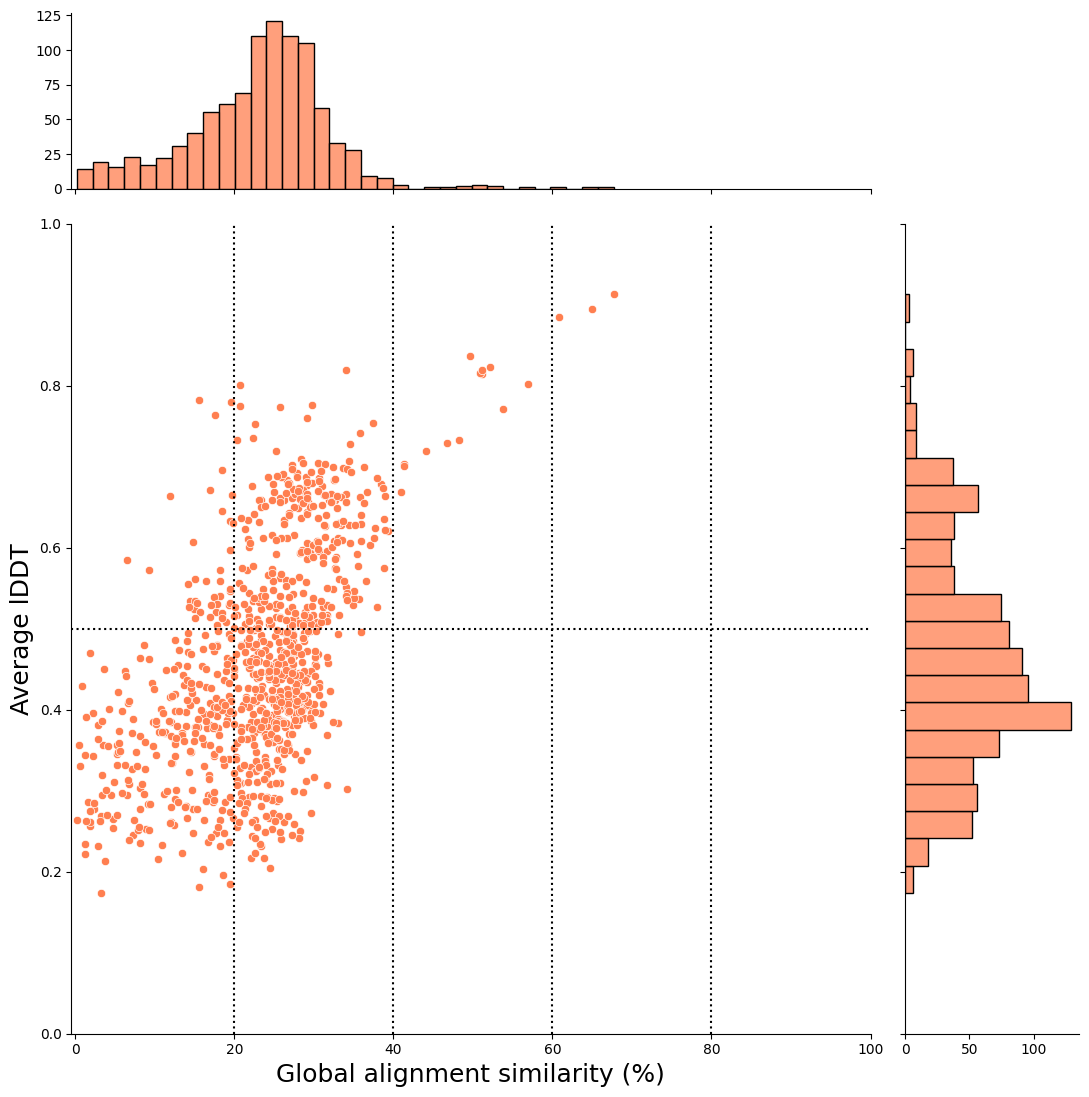

In [19]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_needle",
    y="lddt",
    color="coral",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Global alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")
plt.axhline(y=0.5, color="black", linestyle=":")

plt.show()

<Figure size 4000x4000 with 0 Axes>

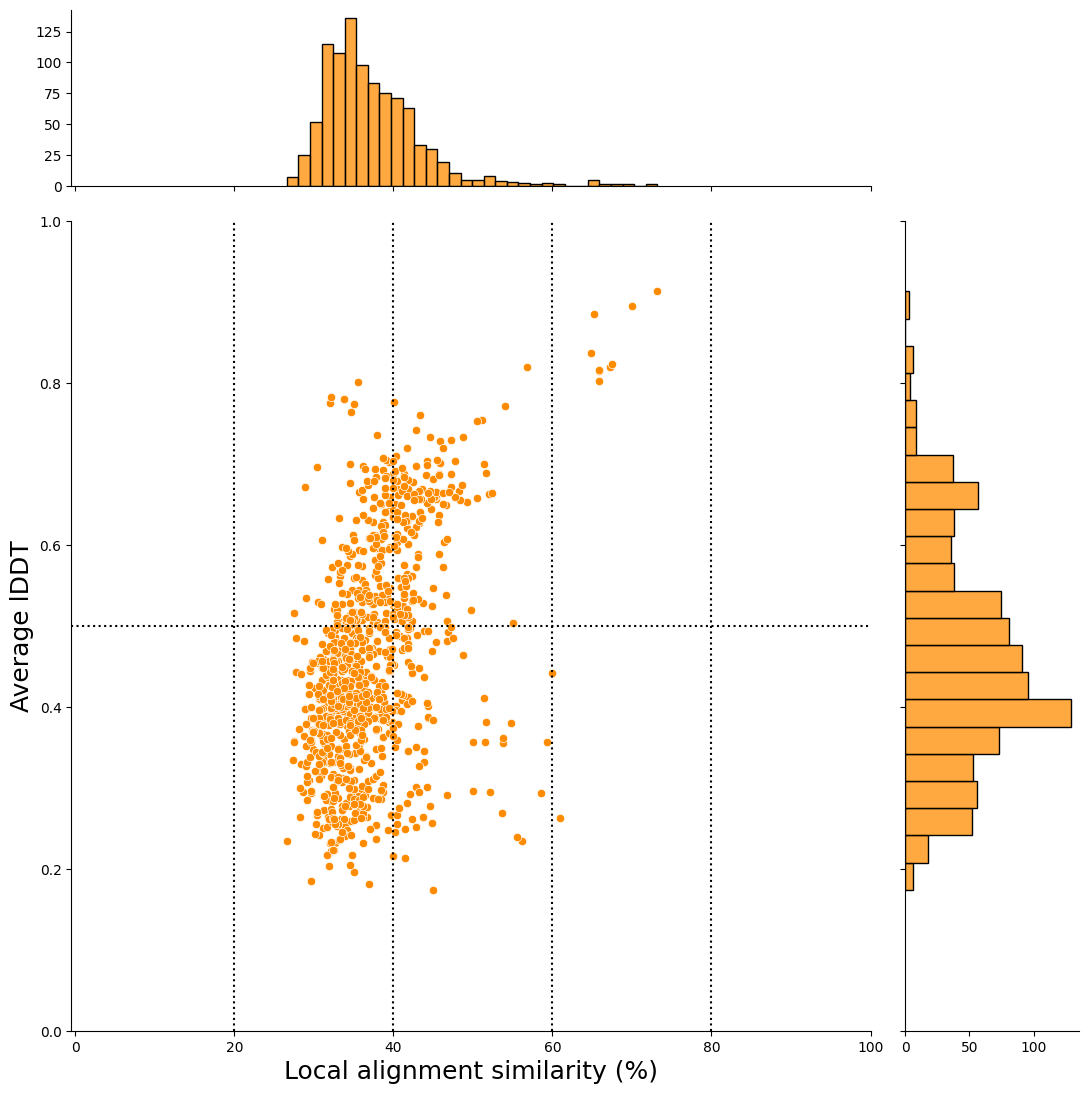

In [20]:
foldseek_filter_viz_pd = foldseek_filter_viz.to_pandas()

plt.figure(figsize=(8, 8), dpi=500)

sns.jointplot(
    data=foldseek_filter_viz_pd,
    x="Similarity_percent_water",
    y="lddt",
    color="darkorange",
    height=11,
    ratio=4,
    marginal_ticks=True
)

plt.xlim(-0.5,100)
plt.ylim(0,1)
plt.xlabel("Local alignment similarity (%)", fontsize=18)
plt.ylabel("Average lDDT", fontsize=18) # see foldseek github https://github.com/steineggerlab/foldseek?tab=readme-ov-file#output-search
plt.axvline(x=20, color="black", linestyle=":")
plt.axvline(x=40, color="black", linestyle=":")
plt.axvline(x=60, color="black", linestyle=":")
plt.axvline(x=80, color="black", linestyle=":")

plt.axhline(y=0.5, color="black", linestyle=":")
plt.show()

&nbsp;

&nbsp;
